In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

In [2]:
import sys
sys.path.append('/home/chenzhao/csst/simulation/csstemu/')
from CEmulator.Emulator import CEmulator
csstemu = CEmulator(verbose=True)

Loading the Bkmm emulator...
Using 129 training samples.
Loading the Bkmm_halofit emulator...
Using 129 training samples.
Loading the PkcbLin emulator...
Using 513 training samples.
Loading the XihmNL emulator...
Using 65 training samples.
Loading the PkhmNL emulator...
Using 65 training samples.


## test $P(k)$

In [3]:
%%time
csstemu.set_cosmos(Omegam=0.3)
klist = np.logspace(-2, 0.9, 1000)
zlist = np.array([0.0, 1.0, 2.0, 3.0])
pkce = csstemu.get_pknl(z=zlist, k=klist, 
                        Pcb=True, lintype='Emulator', 
                        nltype='halofit')
print(pkce.shape)

(4, 1000)
CPU times: user 33.6 ms, sys: 944 µs, total: 34.6 ms
Wall time: 33.3 ms


In [4]:
%%time
cosmo_class = csstemu.get_cosmos_class(z=zlist, kmax=10.0, non_linear='HMCODE')
pkhm = np.zeros((len(zlist), len(klist)))
h0 = csstemu.Cosmo.h0
for iz in range(len(zlist)):
    pkhm[iz] = np.array([cosmo_class.pk_cb(z=zlist[iz], k=ik*h0)*h0*h0*h0 for ik in klist])

CPU times: user 4.09 s, sys: 10.3 ms, total: 4.1 s
Wall time: 4.11 s


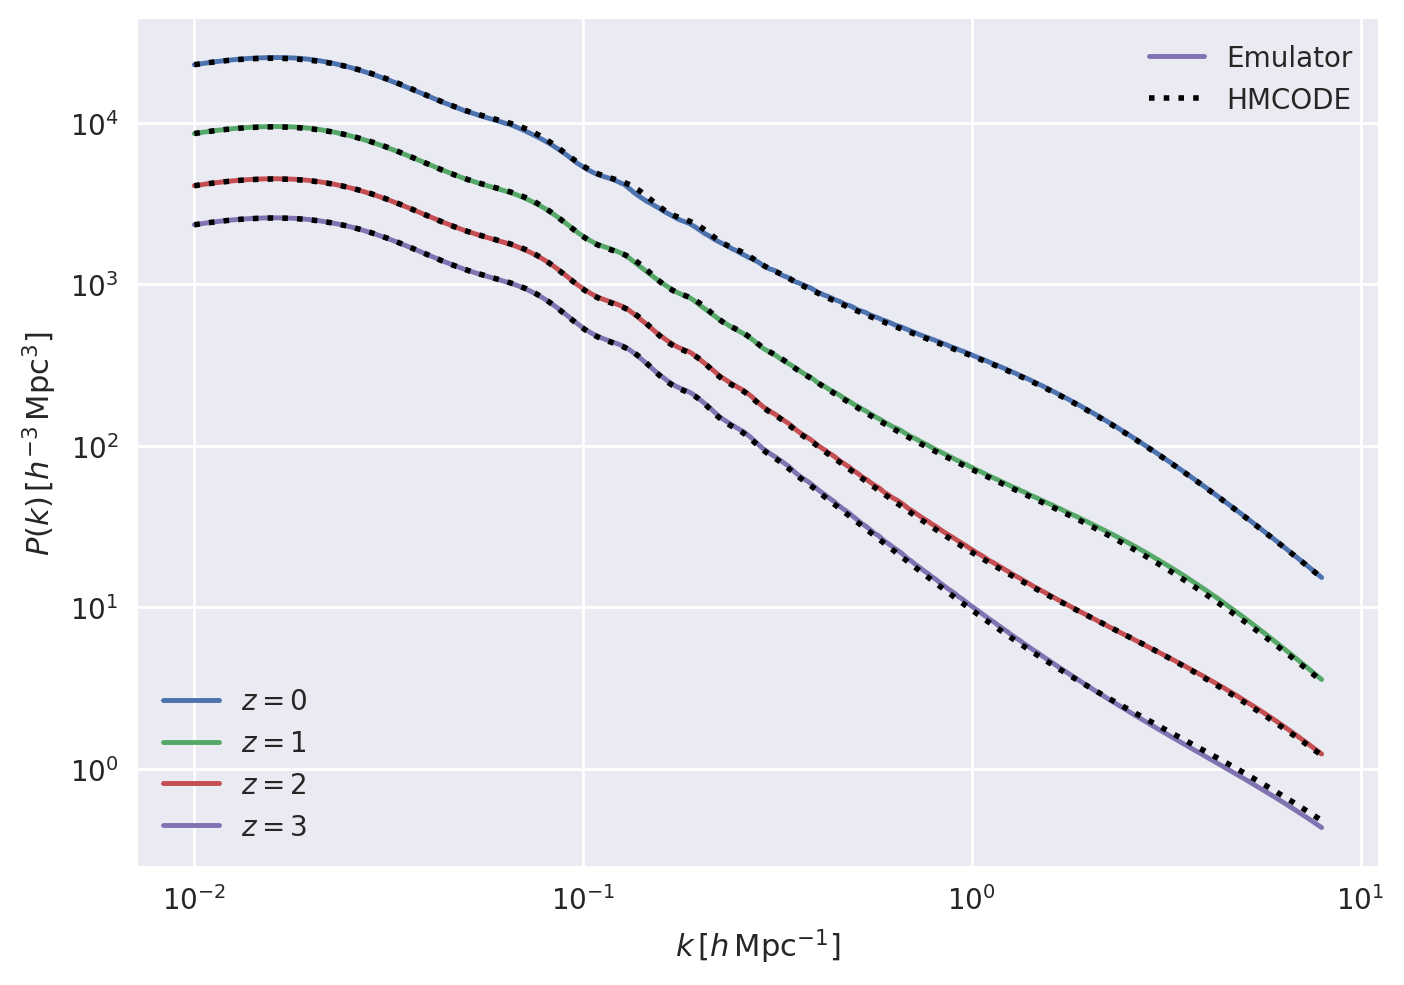

In [5]:
with plt.style.context('seaborn'):
    ax0 = plt.subplot(111)
    for iz in range(len(zlist)):
        l1, = plt.loglog(klist, pkce[iz], label=r'$z=%.0f$'%(zlist[iz]))
        l2, = plt.loglog(klist, pkhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0)
    leg2 = plt.legend(loc=3)
    ax0.add_artist(leg1)
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.ylabel(r'$P(k)\, [h^{-3}\,{\rm Mpc}^3]$')

In [6]:
cosmo_class = csstemu.get_cosmos_class(z=zlist, kmax=10.0, non_linear='HMCODE')
print(cosmo_class.sigma8())

0.7905251085143139


In [7]:
csstemu.get_sigma8_cb('Emulator')

0.7940225986098463

## match $\sigma_8$

In [8]:
csstemu.set_cosmos(As=None, sigma8=0.73)

The As is set to 1.709492e-09 (sigma8=0.730000) to match the input sigma8=0.730000.


In [9]:
pkce = csstemu.get_pknl(z=zlist, k=klist, 
                        Pcb=True, lintype='Emulator', 
                        nltype='halofit')
cosmo_class = csstemu.get_cosmos_class(z=zlist, kmax=10.0, non_linear='HMCODE')
pkhm = np.zeros((len(zlist), len(klist)))
h0 = csstemu.Cosmo.h0
for iz in range(len(zlist)):
    pkhm[iz] = np.array([cosmo_class.pk_cb(z=zlist[iz], k=ik*h0)*h0*h0*h0 for ik in klist])

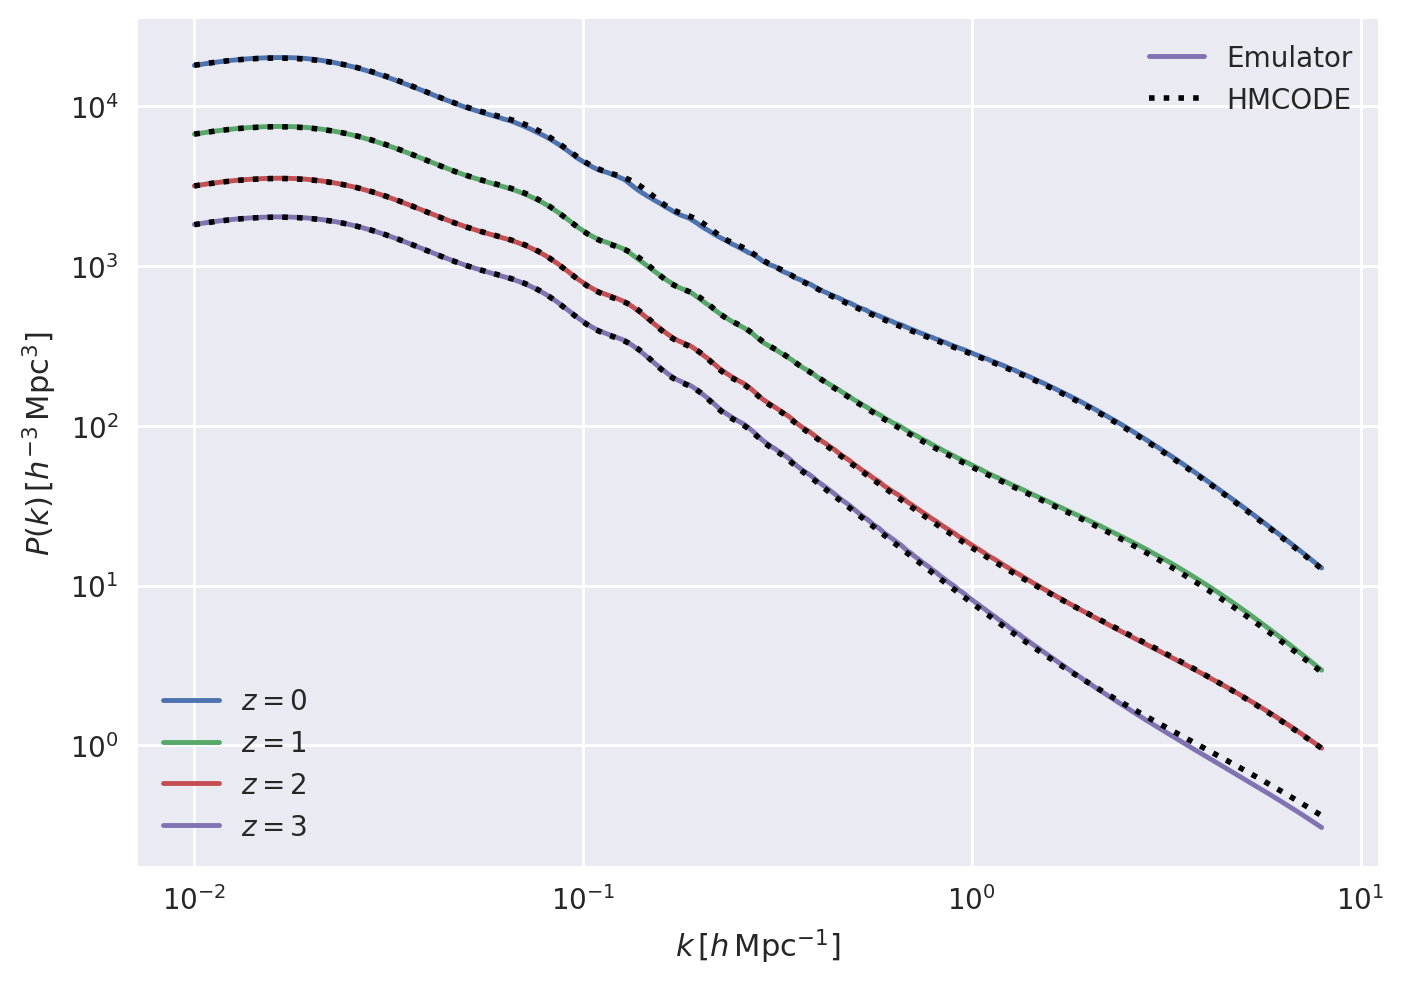

In [10]:
with plt.style.context('seaborn'):
    ax0 = plt.subplot(111)
    for iz in range(len(zlist)):
        l1, = plt.loglog(klist, pkce[iz], label=r'$z=%.0f$'%(zlist[iz]))
        l2, = plt.loglog(klist, pkhm[iz], 'k:', lw=2.0)
    leg1 = plt.legend([l1, l2], ['Emulator', 'HMCODE'], loc=0)
    leg2 = plt.legend(loc=3)
    ax0.add_artist(leg1)
    plt.xlabel(r'$k\, [h\,{\rm Mpc}^{-1}]$')
    plt.ylabel(r'$P(k)\, [h^{-3}\,{\rm Mpc}^3]$')

In [11]:
csstemu.cosmologies

array([[ 4.89746800e-02,  3.09692820e-01,  6.76600000e+01,
         9.66500000e-01,  1.70949161e+00, -1.00000000e+00,
         0.00000000e+00,  6.00000000e-02]])

In [12]:
csstemu.get_sigma8()

0.7299999999999998

In [13]:
csstemu.Cosmo.As

1.7094916122148247e-09